#importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

load data set

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

check data 

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8946,8947,15572294,Kelly,623,France,Male,28,7,0.00,1,0,0,129526.57,0
4567,4568,15768530,Emery,554,Spain,Female,27,4,0.00,2,1,1,135083.73,0
7959,7960,15686999,Nicholas,556,France,Female,40,8,0.00,2,1,0,62112.70,0
3623,3624,15627162,Blesing,695,Germany,Male,27,6,125552.96,1,1,0,105291.26,0
1132,1133,15762110,Anderson,628,France,Male,37,0,0.00,2,1,1,171707.93,0
9956,9957,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
1107,1108,15660316,Stephenson,420,Germany,Female,34,1,135549.90,1,0,0,149471.13,1
4066,4067,15736154,Gallo,823,France,Female,44,1,0.00,2,0,1,182495.70,0
4646,4647,15665008,Sidorov,805,Germany,Female,26,8,42712.87,2,1,1,28861.69,0
6783,6784,15651955,Hanson,603,France,Male,31,4,0.00,2,0,1,9607.10,0


# starting EDA

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#now we are checking columns and their data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

<Axes: xlabel='Exited'>

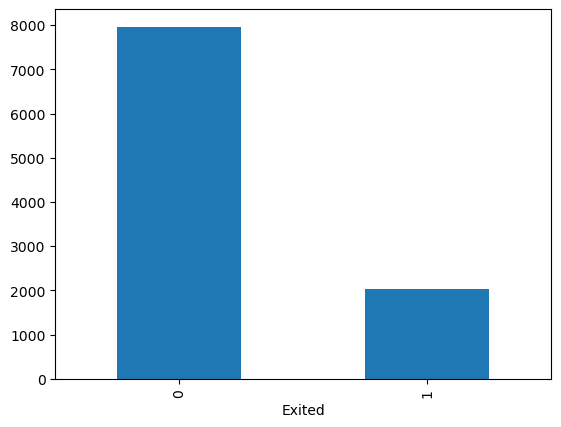

In [9]:
df['Exited'].value_counts().plot(kind="bar")

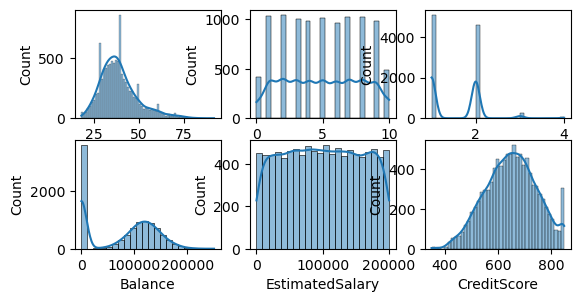

In [10]:
def plotting(var,num):
    plt.subplot(3,3,num)
    sns.histplot(df[var],kde = True)

plotting("Age",1)
plotting("Tenure",2)
plotting("NumOfProducts",3)
plotting("Balance",4)
plotting("EstimatedSalary",5)
plotting("CreditScore",6)



In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

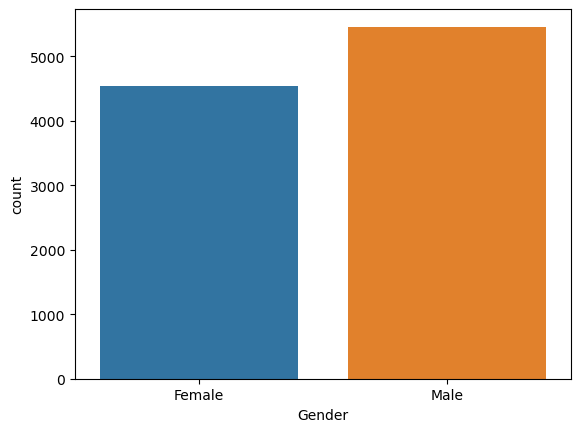

In [14]:
sns.countplot(x=df["Gender"])

<Axes: xlabel='Geography', ylabel='count'>

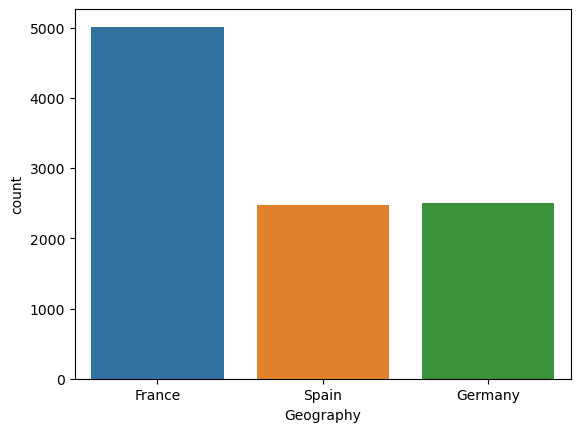

In [15]:
sns.countplot(x=df["Geography"])

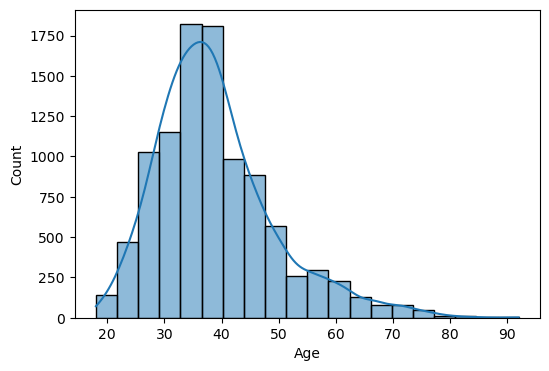

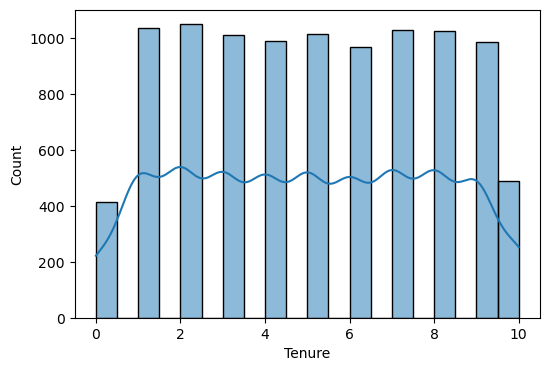

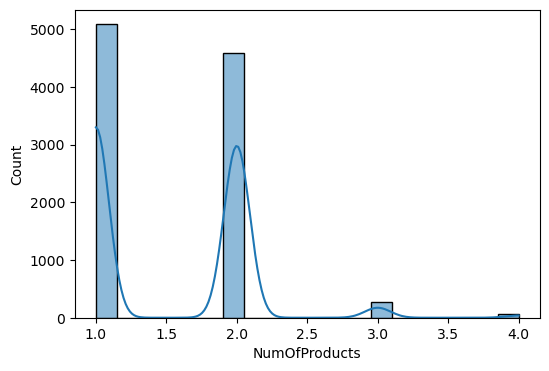

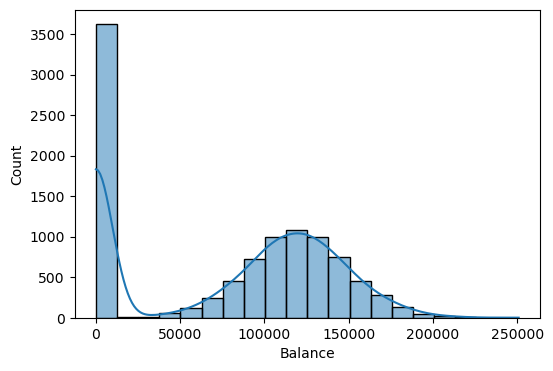

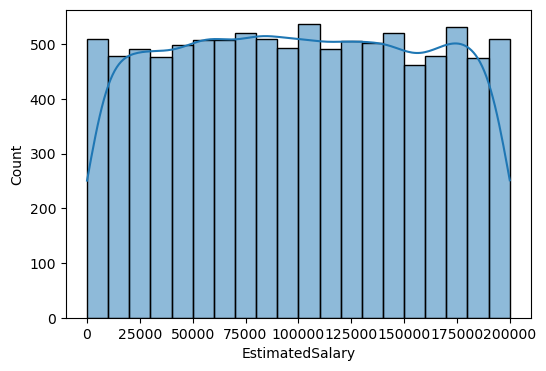

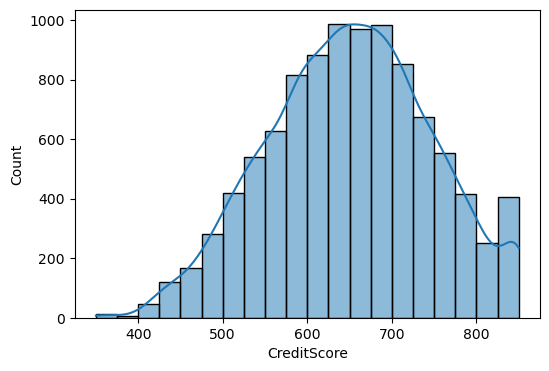

In [16]:
numeric_columns = ['Age', 'Tenure', 'NumOfProducts','Balance','EstimatedSalary','CreditScore']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True,bins = 20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df['CustomerId'].duplicated().sum()

0

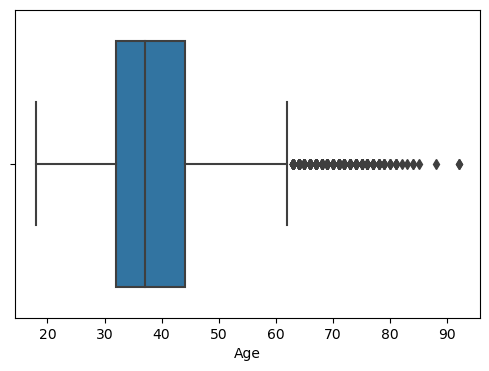

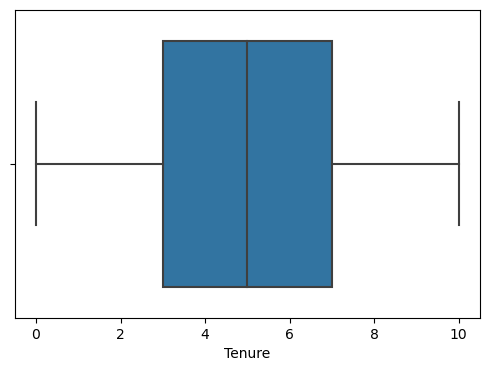

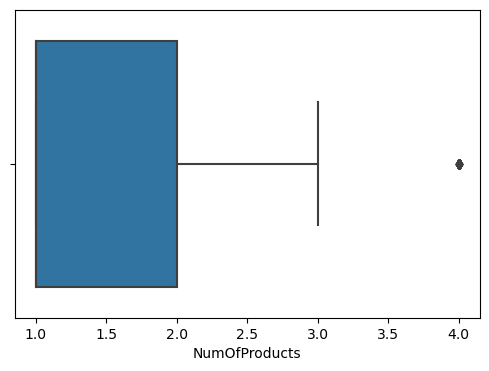

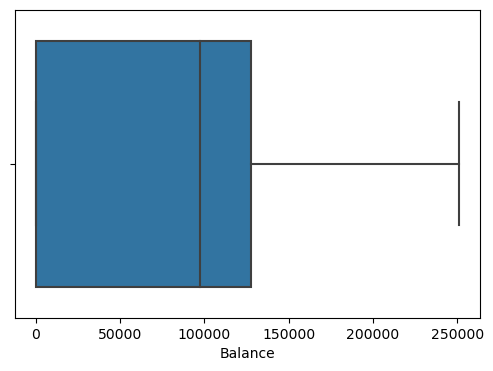

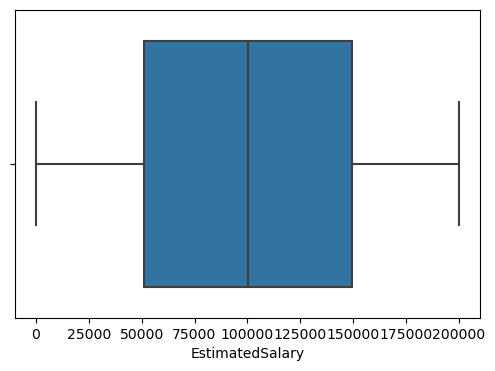

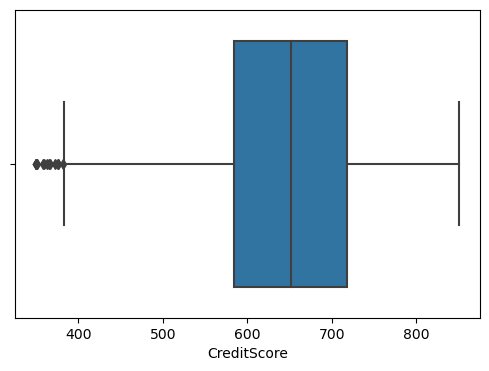

In [19]:
for col in numeric_columns:
    plt.figure(figsize= (6,4))
    sns.boxplot(x = df[col])


<Axes: >

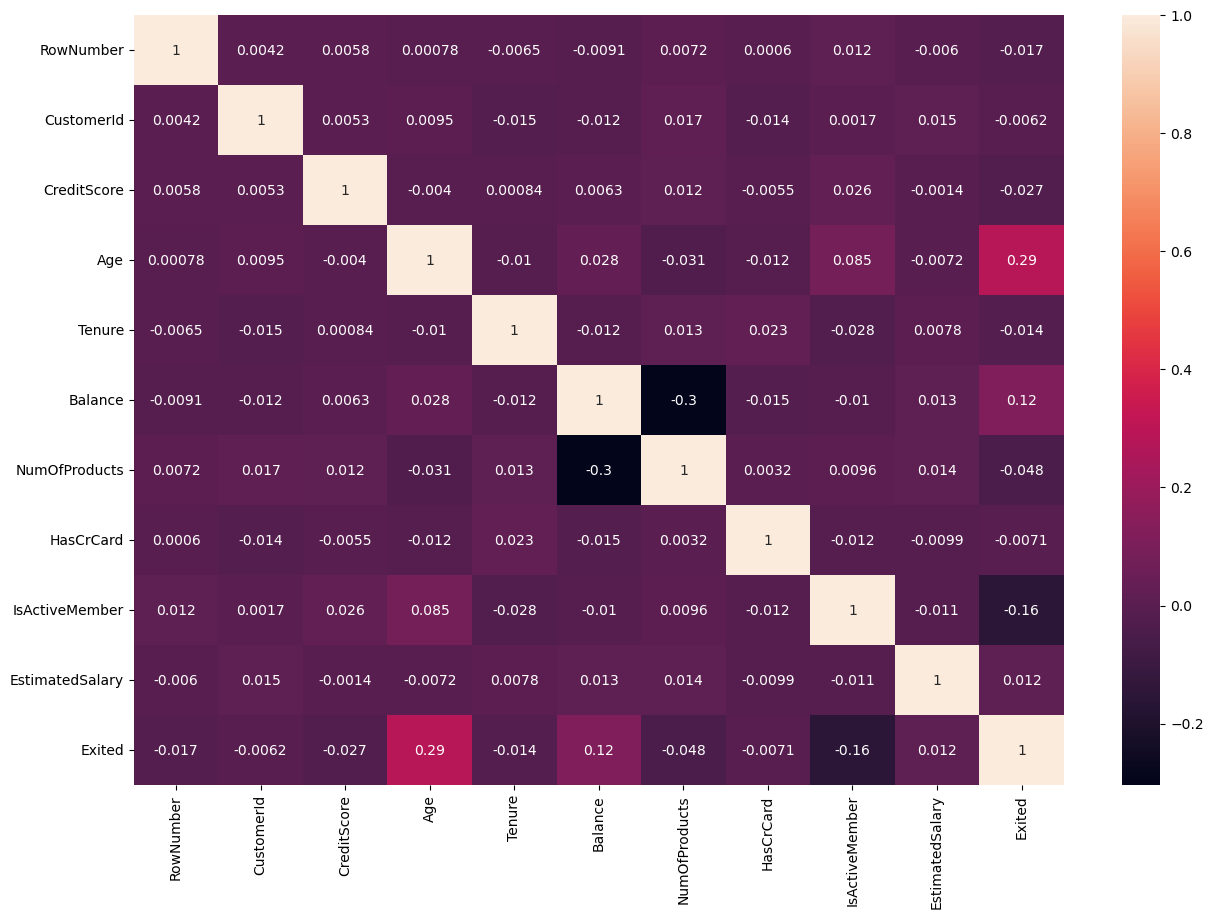

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [45]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
     # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
   RowNumber  CustomerId  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          1    15634602        619.0  42.0     2.0       0.00            1.0   
1          2    15647311        608.0  41.0     1.0   83807.86            1.0   
2          3    15619304        502.0  42.0     8.0  159660.80            3.0   
3          4    15701354        699.0  39.0     1.0       0.00            2.0   
4          5    15737888        850.0  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  \
0          1               1        101348.88       1        False   
1          0               1        112542.58       0        False   
2          1               0        113931.57       1        False   
3          0               0         93826.63       0        False   
4          1               1         79084.10       0        False   

   Geography_Germany  Geography_Spain  
0    

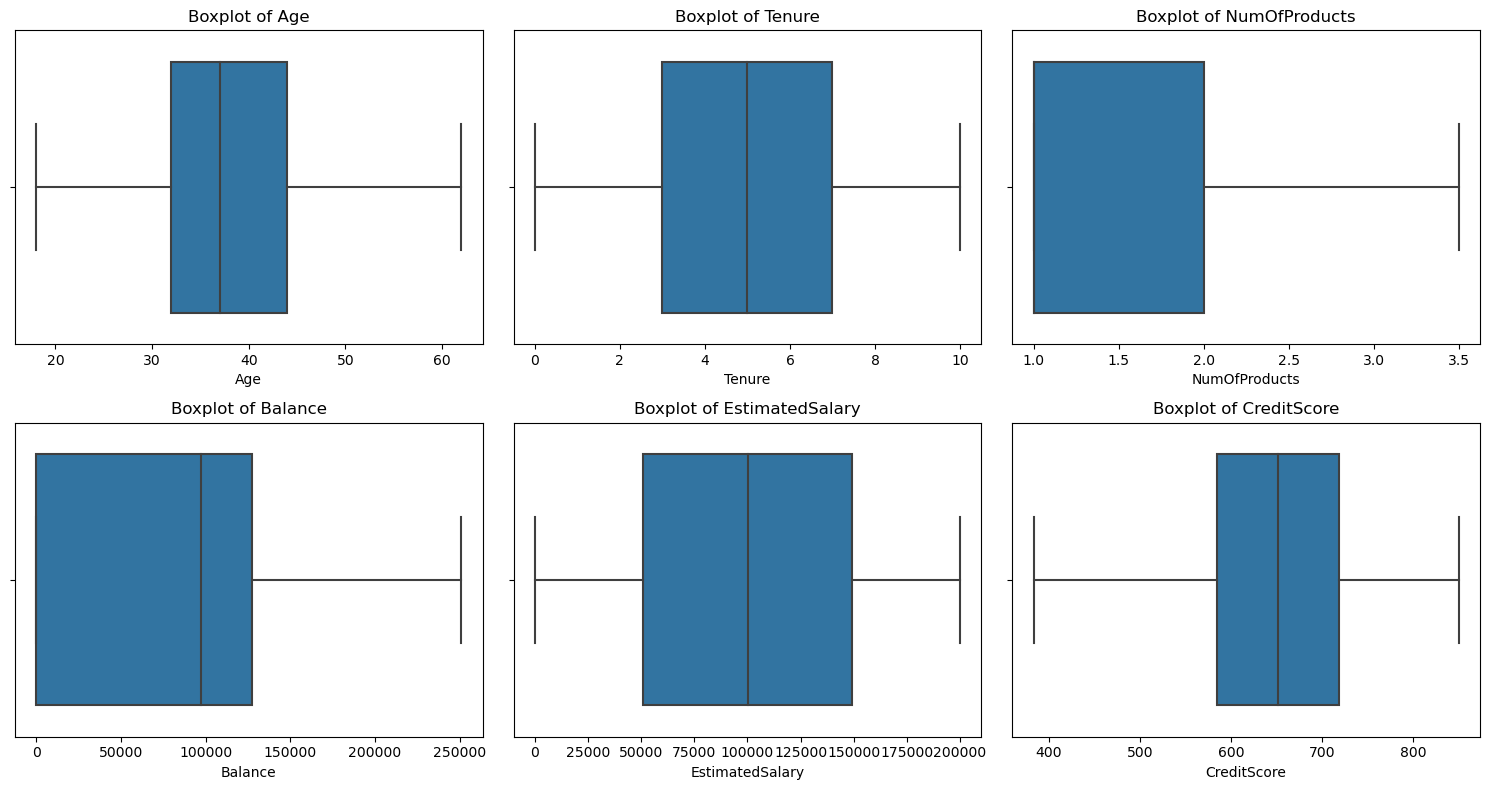

In [22]:

cols_per_row = 3
rows_needed = (len(numeric_columns) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

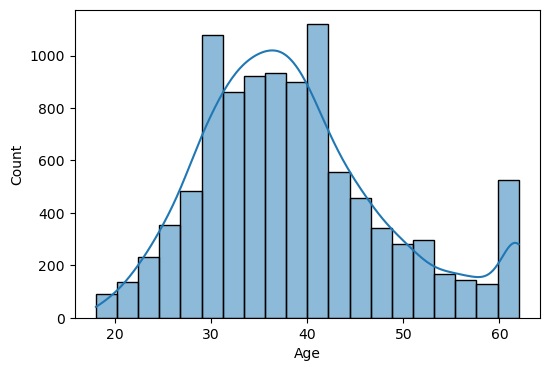

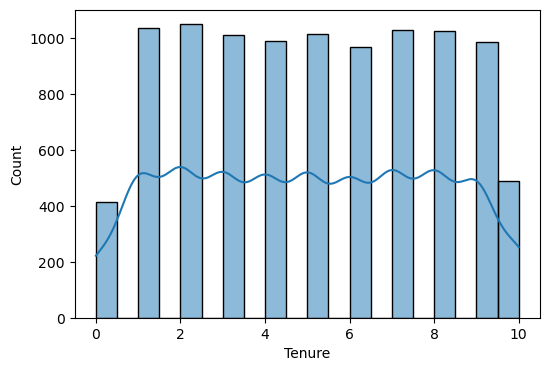

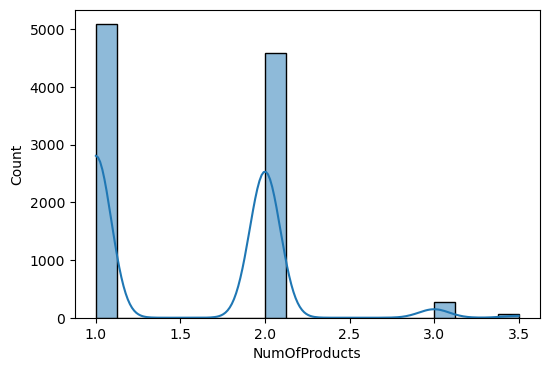

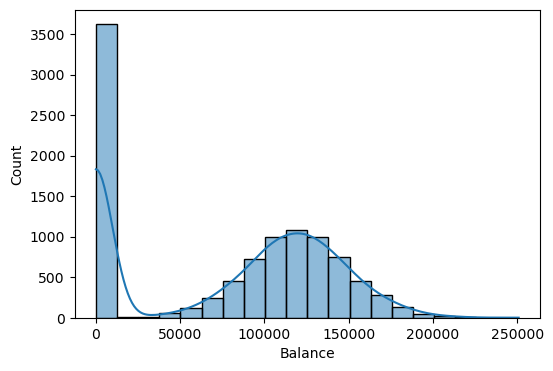

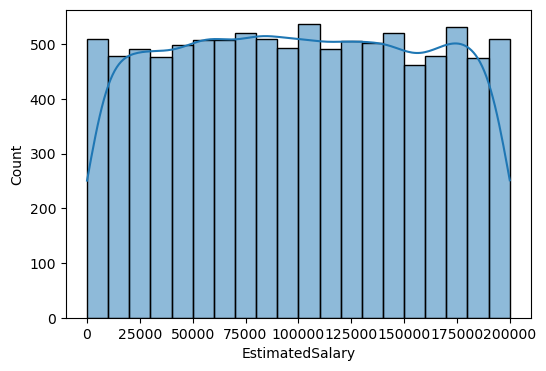

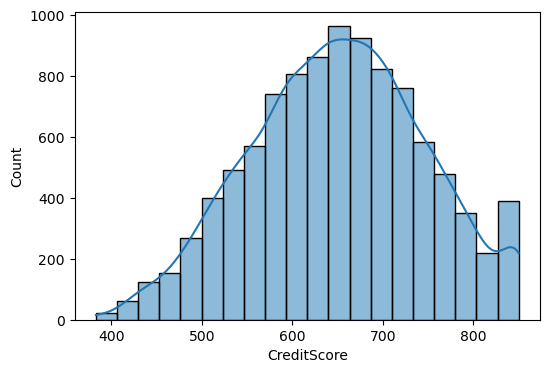

In [23]:

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True,bins = 20)

In [24]:
df.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005794,-0.000443,-0.006495,-0.009067,0.007075,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005429,0.008520,-0.014883,-0.012419,0.018364,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005794,0.005429,1.000000,-0.007703,0.000721,0.006389,0.012276,-0.005396,0.025537,-0.001150,-0.026455
Age,-0.000443,0.008520,-0.007703,1.000000,-0.011163,0.033021,-0.036776,-0.012717,0.072455,-0.007392,0.312436
Tenure,-0.006495,-0.014883,0.000721,-0.011163,1.000000,-0.012254,0.013194,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006389,0.033021,-0.012254,1.000000,-0.311810,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007075,0.018364,0.012276,-0.036776,0.013194,-0.311810,1.000000,0.003504,0.010142,0.014065,-0.059196
HasCrCard,0.000599,-0.014025,-0.005396,-0.012717,0.022583,-0.014858,0.003504,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025537,0.072455,-0.028362,-0.010084,0.010142,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001150,-0.007392,0.007784,0.012797,0.014065,-0.009933,-0.011421,1.000000,0.012097


In [25]:
df=df.drop(['Surname'],axis=1)

In [26]:
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619.0,France,Female,42.0,2.0,0.00,1.0,1,1,101348.88,1
1,2,15647311,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0,1,112542.58,0
2,3,15619304,502.0,France,Female,42.0,8.0,159660.80,3.0,1,0,113931.57,1
3,4,15701354,699.0,France,Female,39.0,1.0,0.00,2.0,0,0,93826.63,0
4,5,15737888,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771.0,France,Male,39.0,5.0,0.00,2.0,1,0,96270.64,0
9996,9997,15569892,516.0,France,Male,35.0,10.0,57369.61,1.0,1,1,101699.77,0
9997,9998,15584532,709.0,France,Female,36.0,7.0,0.00,1.0,0,1,42085.58,1
9998,9999,15682355,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1,0,92888.52,1


In [27]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

In [28]:
df.astype(int)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0,1,1,1,101348,1,0,0,0
1,2,15647311,608,41,1,83807,1,0,1,112542,0,0,0,1
2,3,15619304,502,42,8,159660,3,1,0,113931,1,0,0,0
3,4,15701354,699,39,1,0,2,0,0,93826,0,0,0,0
4,5,15737888,850,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0,2,1,0,96270,0,1,0,0
9996,9997,15569892,516,35,10,57369,1,1,1,101699,0,1,0,0
9997,9998,15584532,709,36,7,0,1,0,1,42085,1,0,0,0
9998,9999,15682355,772,42,3,75075,2,1,0,92888,1,1,1,0


In [29]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [35]:
accuracy_score(y_test,y_pred)

0.865

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1553   54]
 [ 216  177]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

